In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.path.realpath("urldata.csv"))
print(os.listdir("/content/"))

/content/urldata.csv
['.config', '1130total.csv', 'sample_data']


여기서부터

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

data = pd.read_csv("/content/Alexa.csv")
alexa = data.drop('Unnamed: 0',axis=1)
print(alexa.shape)
alexa.head()


(50000, 3)


,url,label,result
0,google.com,benign,0
1,youtube.com,benign,0
2,facebook.com,benign,0
3,baidu.com,benign,0
4,wikipedia.org,benign,0


In [ ]:
openphish = pd.read_csv("/content/openphish.csv", encoding='cp949')
print(openphish.shape)
openphish.head()

(500, 3)


,url,label,result
0,http://pmbonline.unmuha.ac.id/dnd/authorize_cl...,malicious,1
1,http://u1315347ln4.ha004.t.justns.ru/CA/CA/eba...,malicious,1
2,http://u1315347ln4.ha004.t.justns.ru/CA/CA/bcb...,malicious,1
3,http://u1315347ln4.ha004.t.justns.ru/CA/CA/e85...,malicious,1
4,https://www.co.jp.zglwhw.cn/,malicious,1


In [ ]:
phishtank = pd.read_csv("/content/phishtank_verified_online.csv", encoding='cp949')
print(phishtank.shape)
phishtank.head()

(13287, 3)


,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
malicious = pd.DataFrame()
malicious = pd.concat([malicious, openphish])
malicious = pd.concat([malicious, phishtank])
print(malicious.shape)

(13787, 3)


In [ ]:
malicious.to_csv('./maliciousurl.csv')

In [ ]:
url_keras = pd.read_csv("/content/urldata.csv")
url_keras = url_keras.drop('Unnamed: 0',axis=1)
print(url_keras.shape)
url_keras.head()

(450176, 3)


,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
total = pd.DataFrame()
total = pd.concat([total, url_keras])
total = pd.concat([total, malicious])
total = pd.concat([total, alexa])
print(total.shape)
total.head()


(513963, 3)


,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
total.info()
total.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513963 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     513963 non-null  object
 1   label   513963 non-null  object
 2   result  513963 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.7+ MB


url       0
label     0
result    0
dtype: int64

In [ ]:
total.to_csv('./1204total.csv')

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
#Importing dependencies
from urllib.parse import urlparse
import os.path
import re

import keras
import joblib
import tensorflow as tf

urldata =  total
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0


urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))


#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1


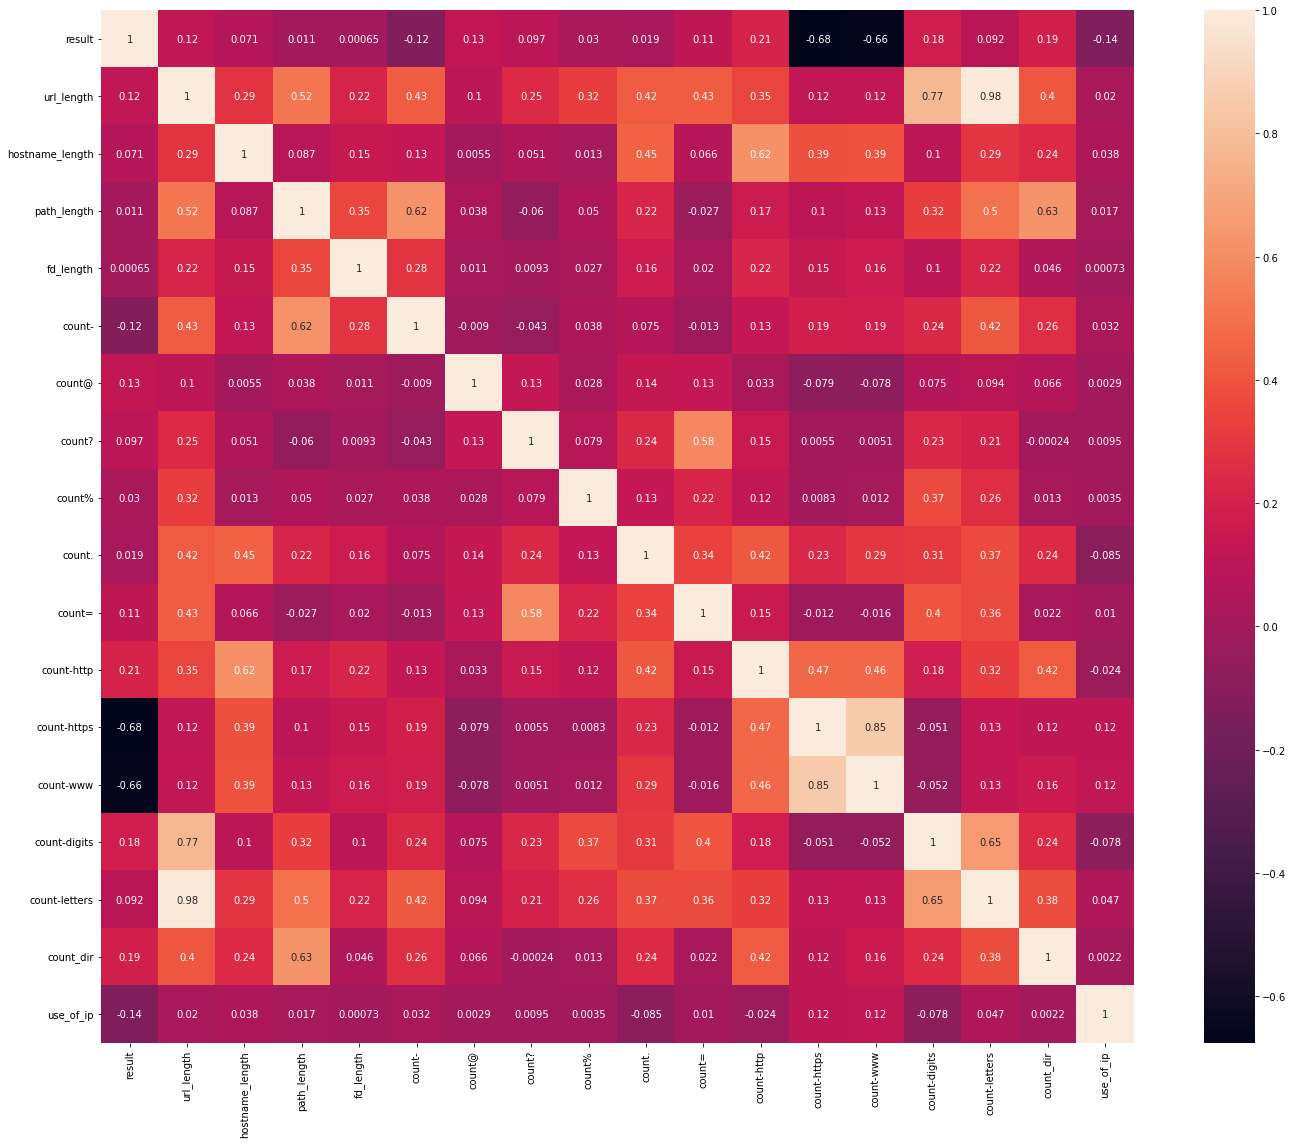

In [ ]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

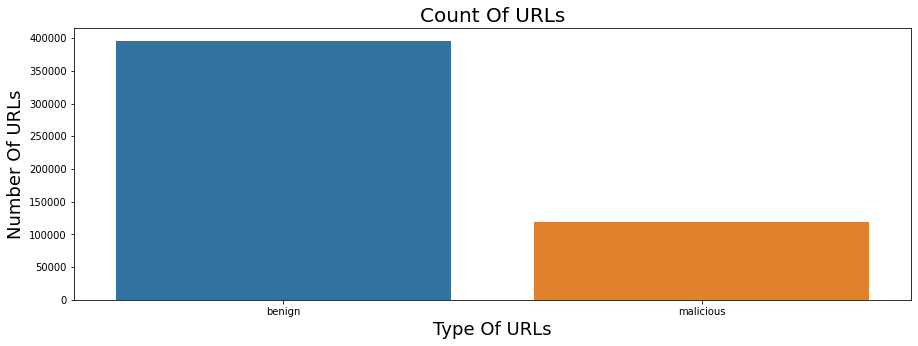

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.00 %
Percent Of Benign URLs:77.00 %


(0.0, 1000.0)

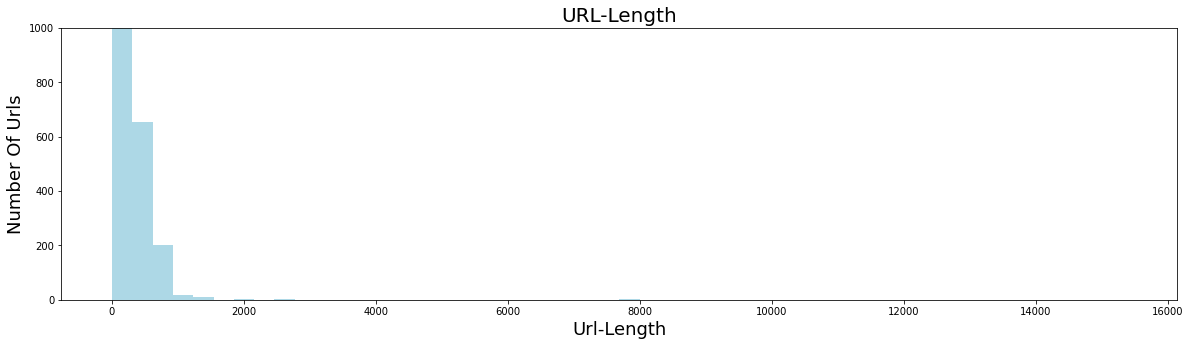

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

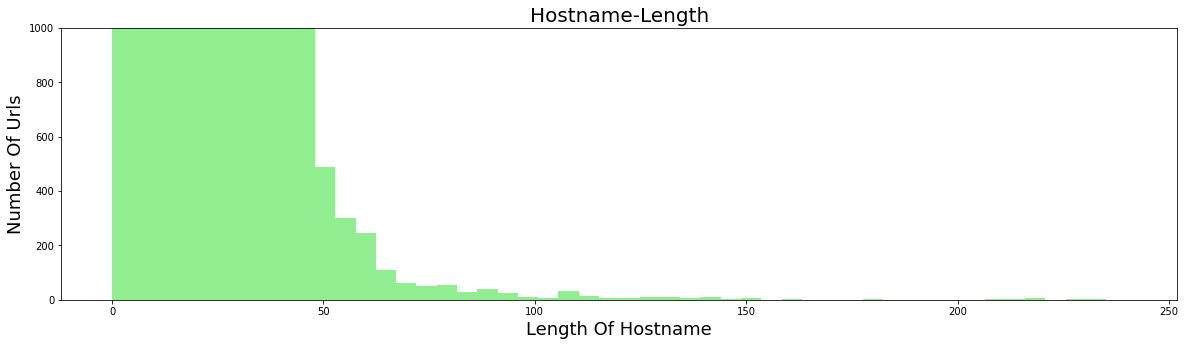

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

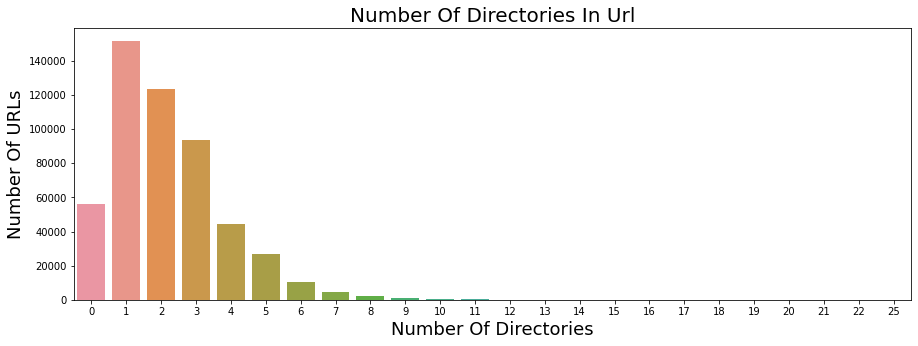

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

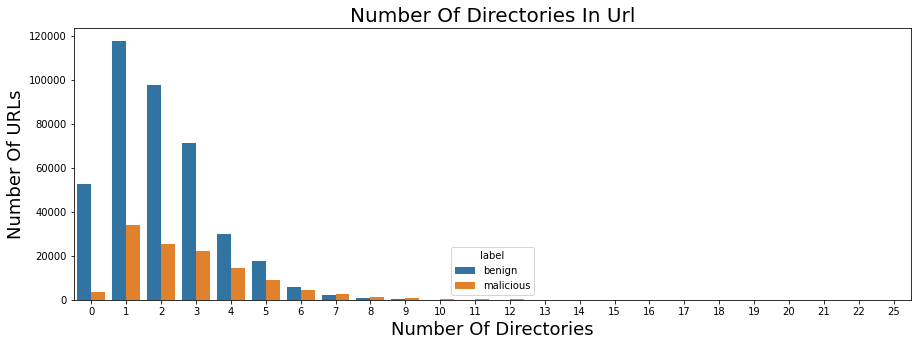

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

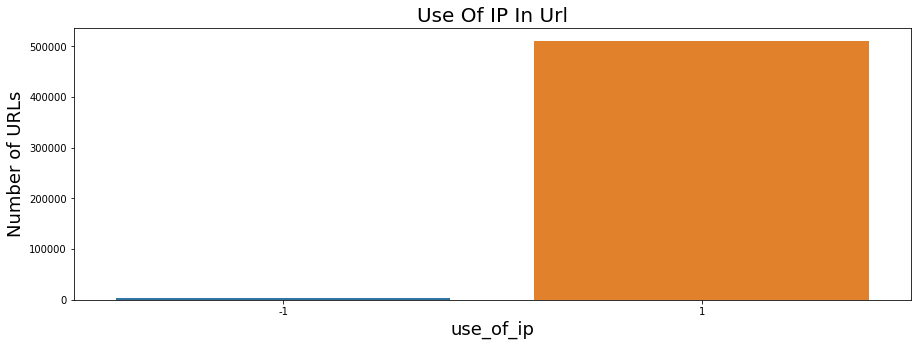

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

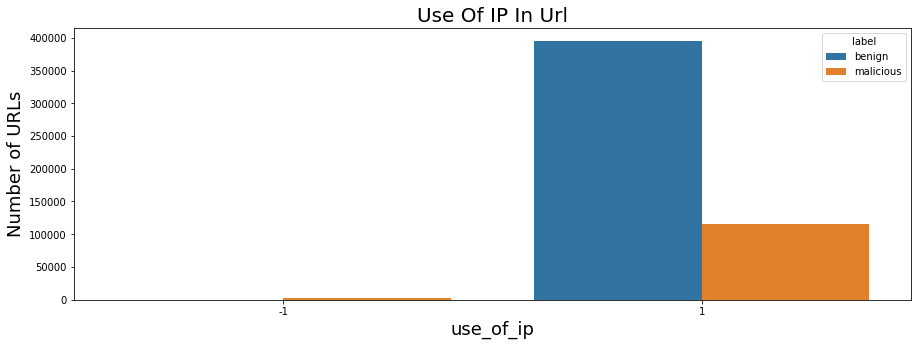

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

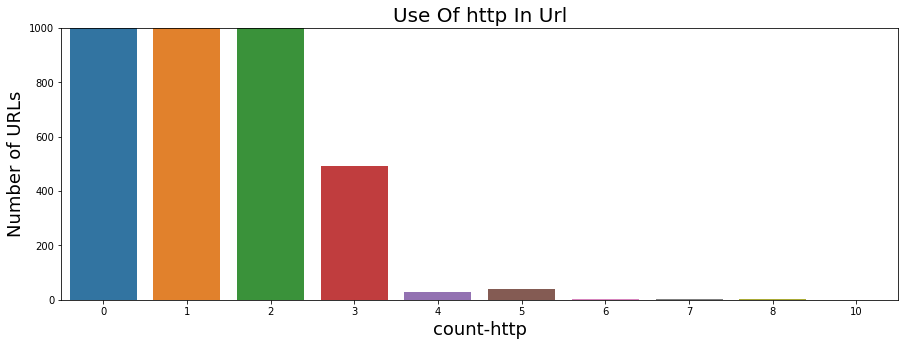

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

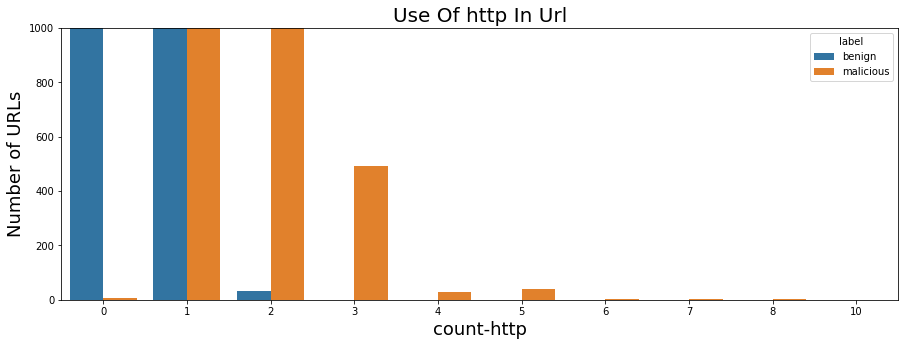

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

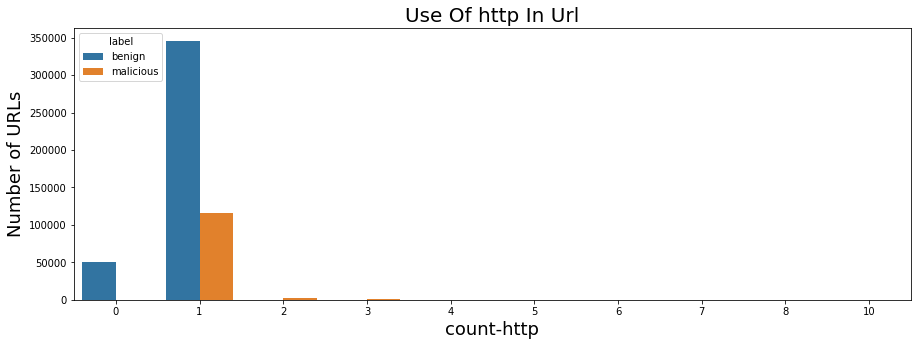

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

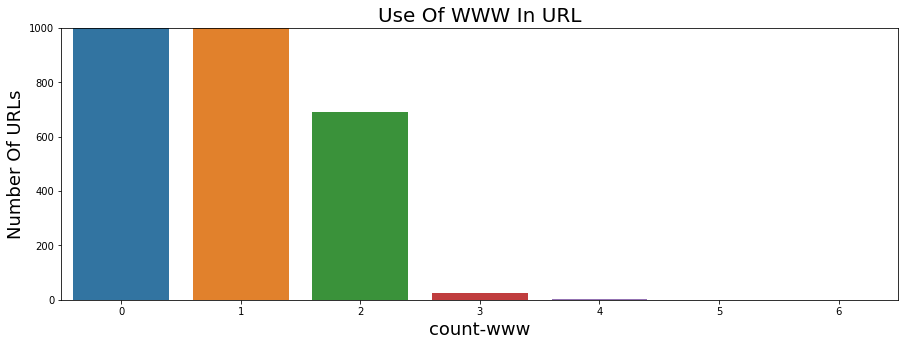

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

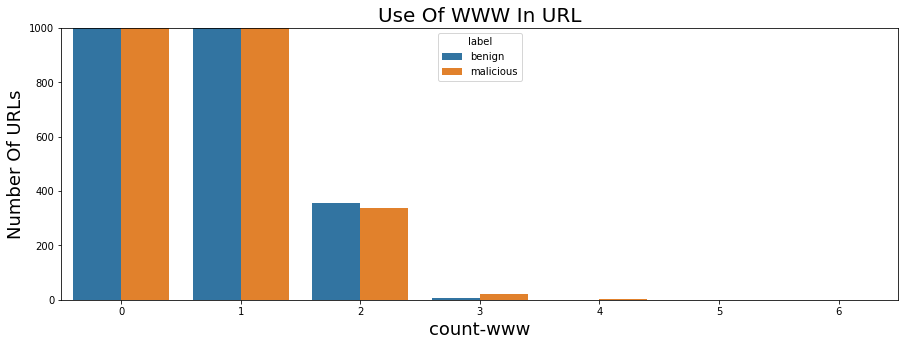

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']
print(x.shape)
print(y.shape)
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

(513963, 16)
(513963,)
Percent Of Malicious URLs:23.00 %
Percent Of Benign URLs:77.00 %


In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (791476, 16)
Size of y-sample : (791476, 1)


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_valid: ", y_valid.shape)


Shape of x_train:  (359774, 16)
Shape of x_test:  (154189, 16)
Shape of y_train:  (359774,)
Shape of y_test:  (154189,)
Shape of x_train:  (287819, 16)
Shape of x_test:  (154189, 16)
Shape of x_valid:  (71955, 16)
Shape of y_train:  (287819,)
Shape of y_test:  (154189,)
Shape of y_valid:  (71955,)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

checkpointer = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_valid, y_valid), callbacks=[checkpointer]) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1124/1125 [============================>.] - ETA: 0s - loss: 0.5483 - acc: 0.7660
Epoch 00001: val_acc improved from -inf to 0.80407, saving model to url.h5
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5482 - acc: 0.7660 - val_loss: 0.4618 - val_acc: 0.8041
Epoch 2/5
1107/1125 [============================>.] - ETA: 0s - loss: 0.4052 - acc: 0.8249
Epoch 00002: val_acc improved from 0.80407 to 0.86166, saving model to url.h5
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4044 - acc: 0.8254 - val_loss: 0.3412 - val_acc: 0.8617
Epoch 3/5
1123/1125 [============================>.] - ETA: 0s - loss: 0.2593 - acc: 0.9089
Epoch 00003: val_acc improved from 0.86166 to 0.94915, saving model to url.h5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.2591 - acc: 0.9089 - val_loss: 0.1802 - val_acc: 0.9491
Epoch 4/5
1104/1125 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9638
Epoch 00004: val_acc improved fr

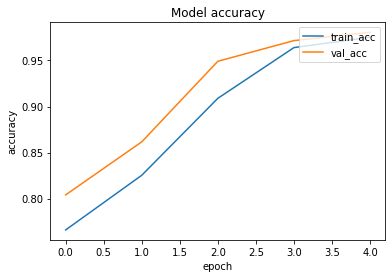

In [ ]:
# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()


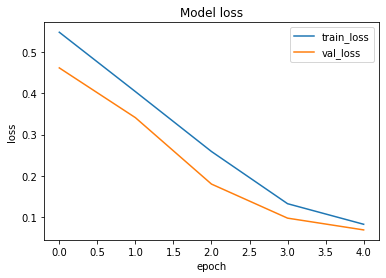

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(x_sample, y_sample, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

12367/12367 [==============================] - 17s 1ms/step - loss: 0.0870 - acc: 0.9693
## evaluation loss and_metrics ##
[0.08704821020364761, 0.9693458676338196]


In [ ]:
# predicting on test data.
pred_test = model.predict(x_sample)
print(pred_test.size)
for i in range (pred_test.size):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

791476


In [ ]:
def view_result(array):
    array = np.array(array)
    for i in range(array.size):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")


In [ ]:
view_result(pred_test[:10])

Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


In [ ]:
view_result(y_sample[:10])

Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

get_clf_eval(y_sample, pred_test)

Confusion Matrix
[[394677   1061]
 [ 23201 372537]]
정확도:0.9693458803551845, 정밀도:0.9971600490366651, 재현율:0.941372827476765


In [ ]:
correct = 0
incorrect = 0
# print(type(y_test))
# print(y_test.to_numpy())
y_sample2 = y_sample.to_numpy()
# print(type(y_test2))
# print(type(pred_test))
print(y_sample2.size)
for i in range(y_sample2.size):
  if( y_sample2[i] == pred_test[i] ) :
    correct += 1
  else :
    incorrect += 1

print("correct : ", correct, " incorrect : ", incorrect)

791476
correct :  767214  incorrect :  24262


여기까지


In [ ]:
data = pd.read_csv("/content/beignurl.csv", encoding='cp949') 

In [ ]:
urldata = data.drop('Unnamed: 0',axis=1)

In [ ]:
urldata.head()

,url,label,result
0,google.com,benign,0
1,youtube.com,benign,0
2,facebook.com,benign,0
3,baidu.com,benign,0
4,wikipedia.org,benign,0


In [ ]:
print(data.shape)

(100001, 4)


In [ ]:
openphish = pd.read_csv("/content/openphish.csv", encoding='cp949')

In [ ]:
print(openphish.shape)

(500, 3)


In [ ]:
openphish.head()

,url,label,result
0,http://pmbonline.unmuha.ac.id/dnd/authorize_cl...,malicious,1
1,http://u1315347ln4.ha004.t.justns.ru/CA/CA/eba...,malicious,1
2,http://u1315347ln4.ha004.t.justns.ru/CA/CA/bcb...,malicious,1
3,http://u1315347ln4.ha004.t.justns.ru/CA/CA/e85...,malicious,1
4,https://www.co.jp.zglwhw.cn/,malicious,1


In [ ]:
phishtank = pd.read_csv("/content/phishtank_verified_online.csv", encoding='cp949')

In [ ]:
phishtank.head()

,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
print(phishtank.shape)

(13287, 3)


In [ ]:
malicious = pd.DataFrame()

In [ ]:
print(malicious.shape)

(0, 0)


In [ ]:
malicious = pd.concat([malicious, openphish])

In [ ]:
print(malicious.shape)

(13787, 3)


In [ ]:
malicious.to_csv('./maliciousurl.csv')

In [ ]:
print(urldata.shape)

(100001, 3)


In [ ]:
urldata.loc[0:49999].to_csv('/content/beignurl_2.csv')

In [ ]:
 url2 = pd.read_csv("/content/beignurl_2.csv", encoding='cp949')

In [ ]:
print(url2.shape)

(50000, 4)


In [ ]:
 url_keras = pd.read_csv("/content/urldata.csv")

In [ ]:
print(url_keras.shape)

(450176, 4)


In [ ]:
malicious = pd.concat([malicious, url2])

In [ ]:
print(malicious.shape)

(513963, 4)


In [ ]:
malicious.to_csv('./1130total.csv')

In [ ]:
urldata = pd.read_csv("/content/1130total.csv")

In [ ]:
urldata.head()

,Unnamed: 0,url,label,result,Unnamed: 0.1
0,0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,NaN
1,1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,NaN
2,2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,NaN
3,3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,NaN
4,4,https://sms.vinted-pl.947519.space,malicious,1,NaN


In [ ]:
#이름이 지정되지 않은 열 제거
urldata = urldata.drop('Unnamed: 0.1',axis=1)
urldata.head()

,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
urldata.shape

(513963, 3)

In [ ]:
urldata.info()
urldata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513963 entries, 0 to 513962
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     513963 non-null  object
 1   label   513963 non-null  object
 2   result  513963 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ MB


In [ ]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [ ]:
import keras

print(keras.__version__)
#Importing dependencies
from urllib.parse import urlparse
import os.path

2.7.0


In [ ]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0


In [ ]:
print(type(urldata))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0


In [ ]:
import re

In [ ]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2,1,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1,1,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2,1,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1,1,1
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0,1,1


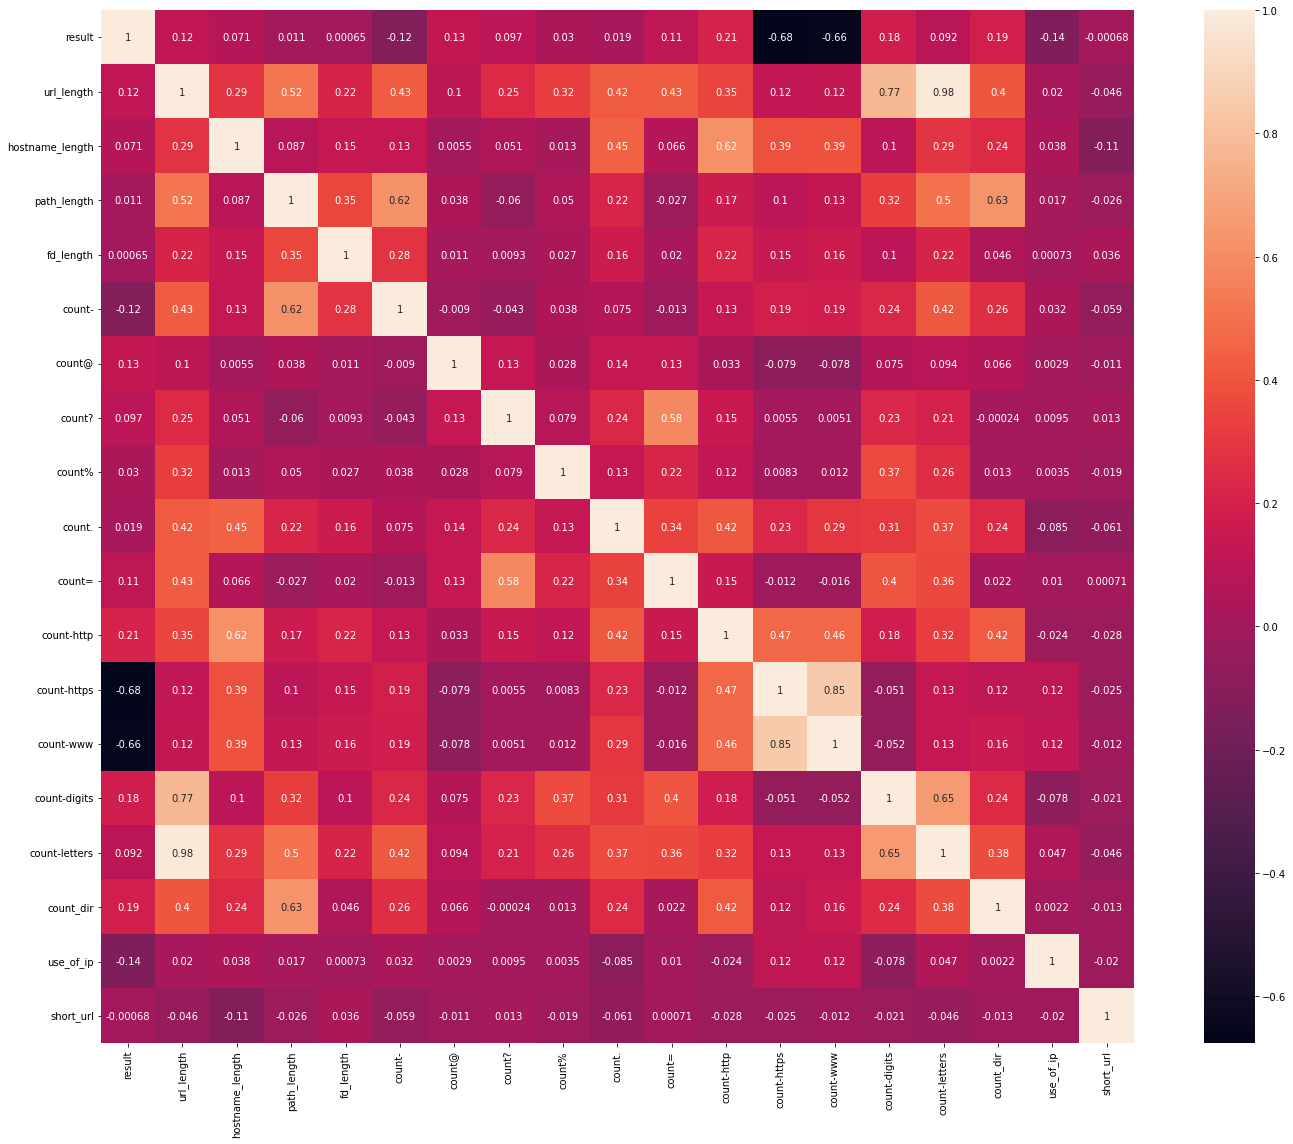

In [ ]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

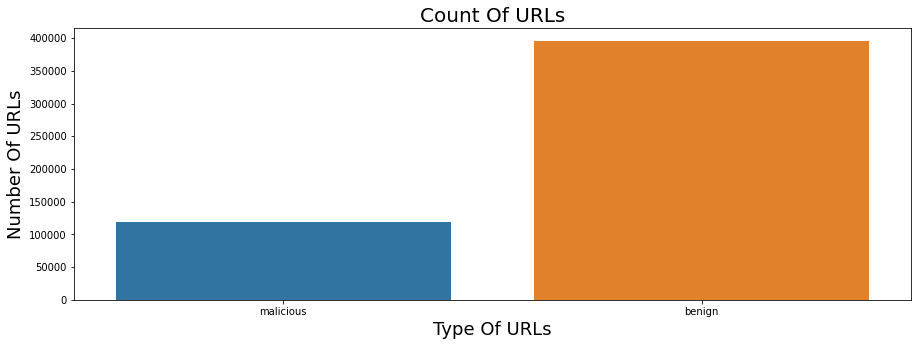

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.00 %
Percent Of Benign URLs:77.00 %


(0.0, 1000.0)

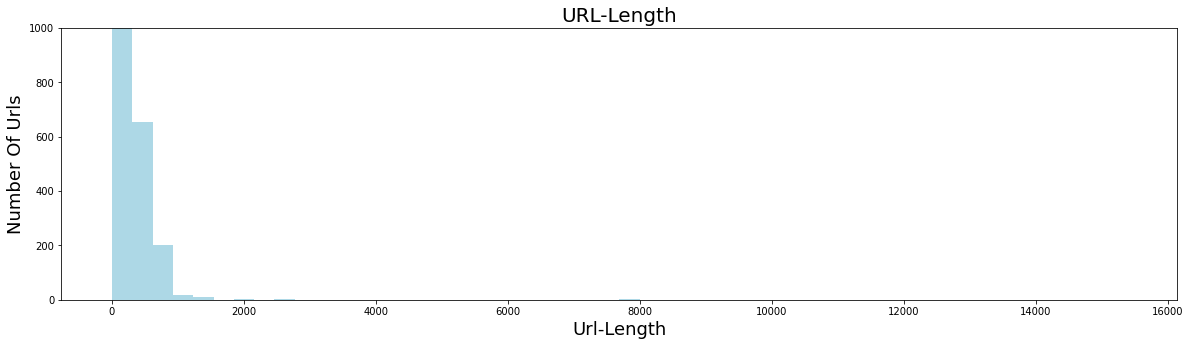

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

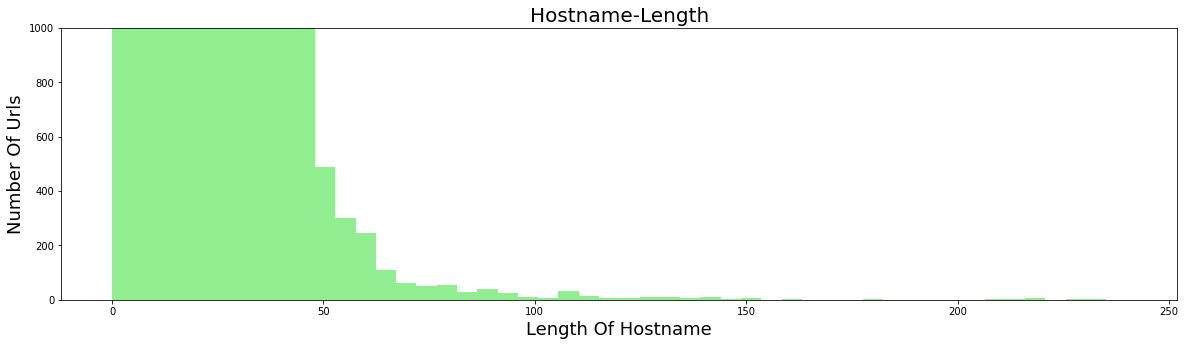

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

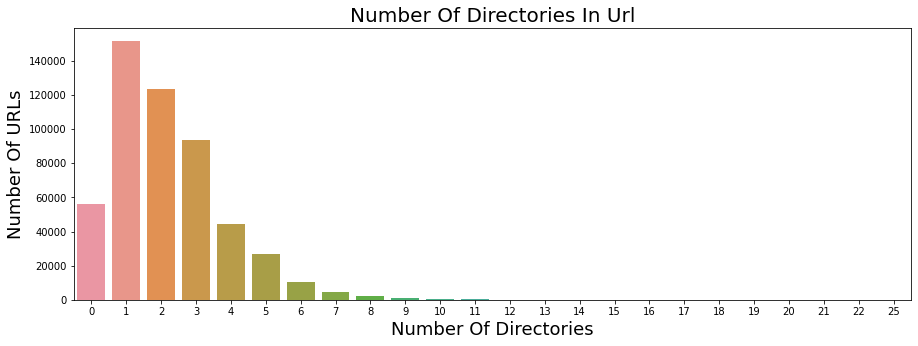

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

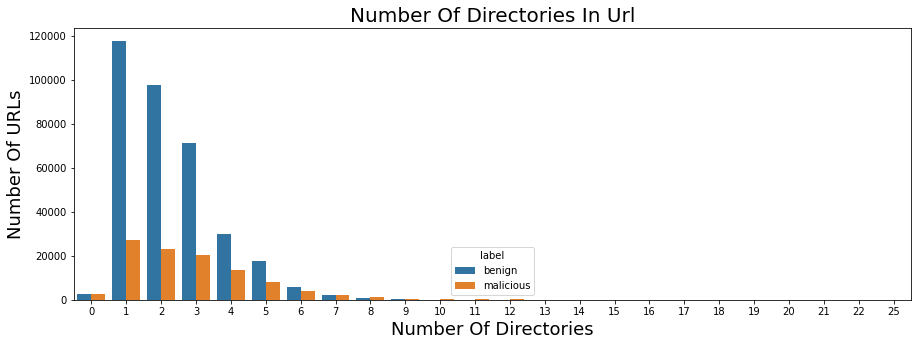

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

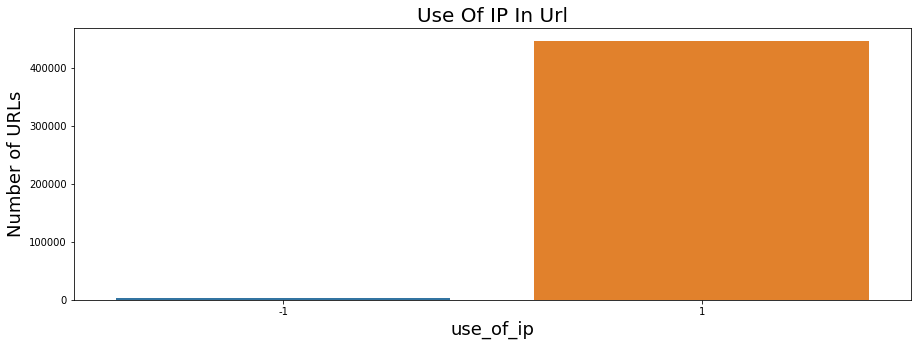

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

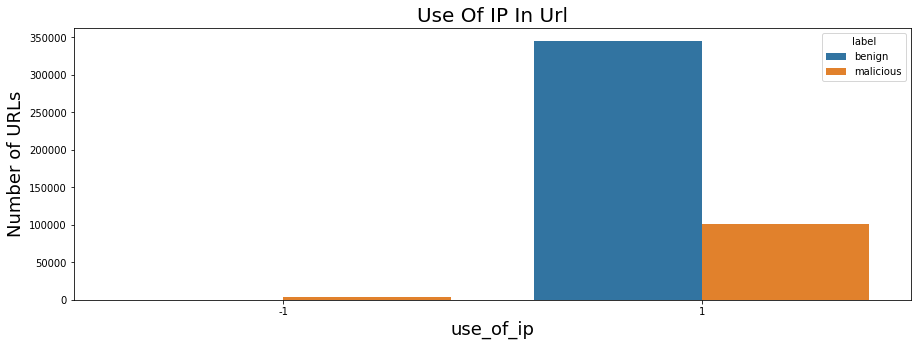

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

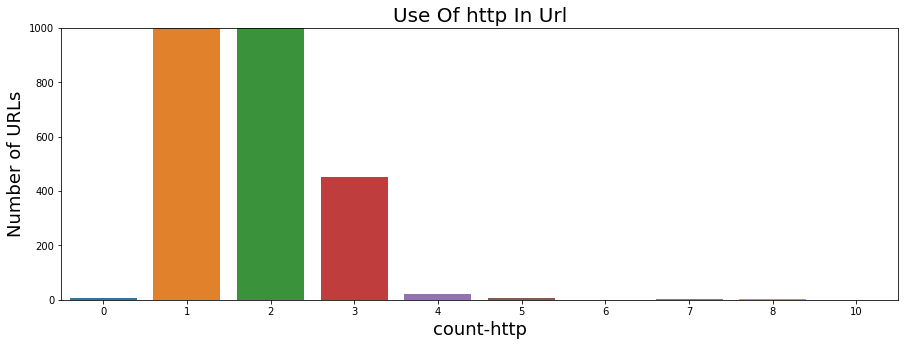

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

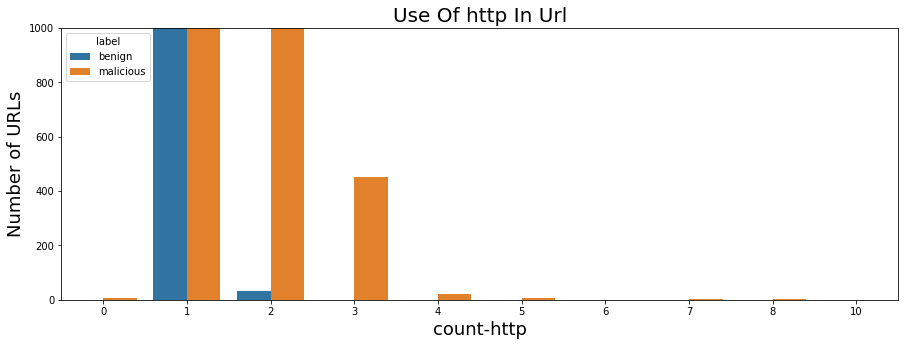

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

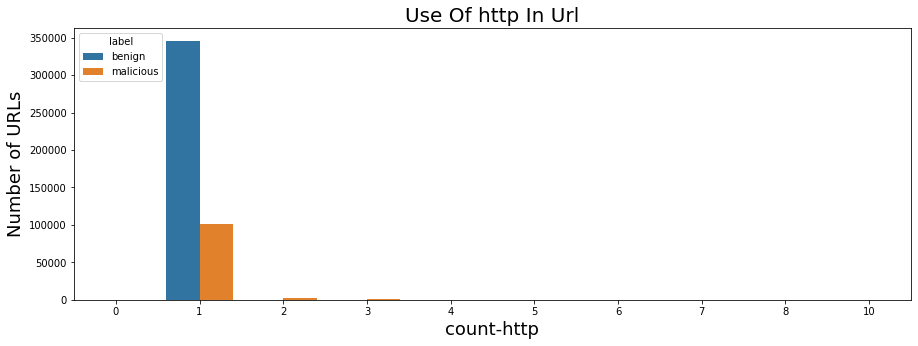

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

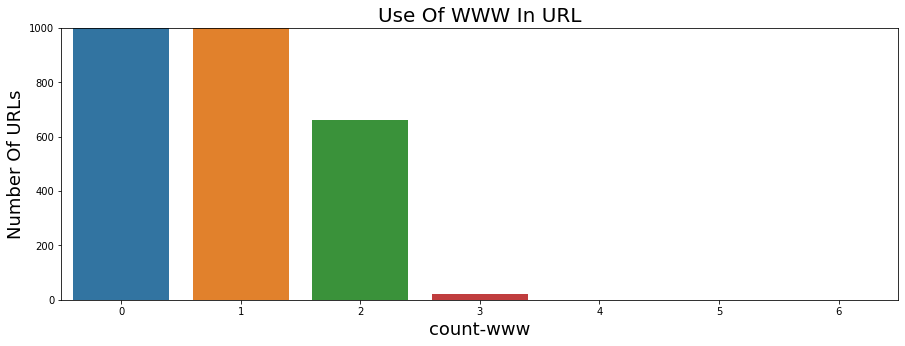

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

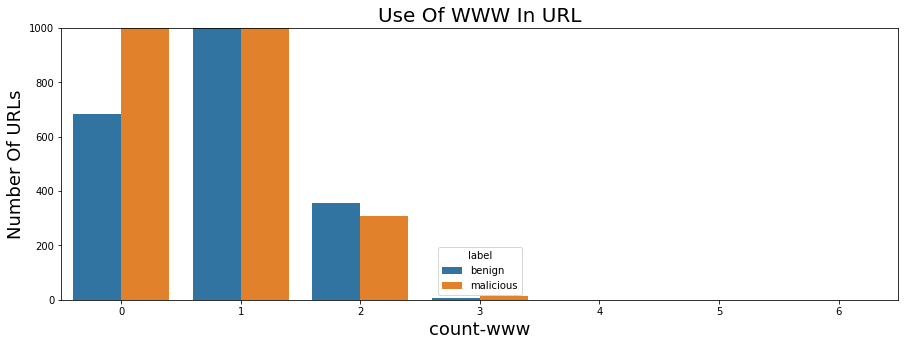

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [ ]:
print(x.shape)
print(y.shape)

(513963, 16)
(513963,)


In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.00 %
Percent Of Benign URLs:77.00 %


In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (791476, 16)
Size of y-sample : (791476, 1)


In [ ]:
x

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2,1
1,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1,1
2,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2,1
3,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1,1
4,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513958,0,10,0,0,0,0,0,2,0,0,0,0,0,8,0,1
513959,0,14,0,0,0,0,0,1,0,0,0,0,0,13,0,1
513960,0,14,0,0,0,0,0,1,0,0,0,0,0,13,0,1
513961,0,17,0,1,0,0,0,1,0,0,0,0,0,15,0,1


In [ ]:
# len = 0
# len2 = 0
# print(y_sample[0].size)
# for i in y_sample[0]:
#   if(i == 0):
#     len += 1
#   elif(i == 1):
#     len2 += 1
# print(len,"&&", len2)

len = 0
len2 = 0
print(y.size)
for i in y:
  if(i == 0):
    len += 1
  elif(i == 1):
    len2 += 1
print(len,"&&", len2)

513963
395738 && 118225


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

shuffledata = pd.DataFrame()
shuffledata['result'] = y_sample[0]
shuffledata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']] = x_sample

In [ ]:
print(shuffledata.shape)
print(urldata.shape)
print(y_sample.shape)

(791476, 17)
(513963, 21)
(791476, 1)


In [ ]:
shuffledata.head()

,result,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,1,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2,1
1,1,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1,1
2,1,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2,1
3,1,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1,1
4,1,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0,1


In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2,1,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1,1,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2,1,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1,1,1
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0,1,1


In [ ]:
print(urldata.columns)

Index(['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?', 'count%',
       'count.', 'count=', 'count-http', 'count-https', 'count-www',
       'count-digits', 'count-letters', 'count_dir', 'use_of_ip', 'short_url'],
      dtype='object')


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_valid: ", y_valid.shape)

# x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3)
# print("Shape of x_train: ", x_train.shape)
# print("Shape of x_test: ", x_test.shape)
# print("Shape of y_train: ", y_train.shape)
# print("Shape of y_test: ", y_test.shape)

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

# print("Shape of x_train: ", x_train.shape)
# print("Shape of x_test: ", x_test.shape)
# print("Shape of x_valid: ", x_valid.shape)
# print("Shape of y_train: ", y_train.shape)
# print("Shape of y_test: ", y_test.shape)
# print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (359774, 16)
Shape of x_test:  (154189, 16)
Shape of y_train:  (359774,)
Shape of y_test:  (154189,)
Shape of x_train:  (287819, 16)
Shape of x_test:  (154189, 16)
Shape of x_valid:  (71955, 16)
Shape of y_train:  (287819,)
Shape of y_test:  (154189,)
Shape of y_valid:  (71955,)


In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x_test, y_test.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (237608, 16)
Size of y-sample : (237608, 1)


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3)
x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (553180, 16)
Shape of x_test:  (207443, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_test:  (207443, 1)
Shape of y_valid:  (138296, 1)


In [ ]:
pip install np_utils

     |████████████████████████████████| 61 kB 5.7 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=0d6bb8e82c43c65421d5f2e1f90f31166d87c16a19a9358ff48c6deb9b70a8a4
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


In [ ]:
x_train.shape

(553180, 16)

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))0

model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpointer = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_valid, y_valid), callbacks=[checkpointer]) 

Epoch 1/5
1117/1125 [============================>.] - ETA: 0s - loss: 0.6057 - acc: 0.7605
Epoch 00001: val_acc improved from -inf to 0.83109, saving model to url.h5
1125/1125 [==============================] - 3s 3ms/step - loss: 0.6045 - acc: 0.7609 - val_loss: 0.4101 - val_acc: 0.8311
Epoch 2/5
1105/1125 [============================>.] - ETA: 0s - loss: 0.3330 - acc: 0.8762
Epoch 00002: val_acc improved from 0.83109 to 0.93342, saving model to url.h5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3317 - acc: 0.8770 - val_loss: 0.2487 - val_acc: 0.9334
Epoch 3/5
1123/1125 [============================>.] - ETA: 0s - loss: 0.1821 - acc: 0.9488
Epoch 00003: val_acc improved from 0.93342 to 0.96271, saving model to url.h5
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1821 - acc: 0.9488 - val_loss: 0.1309 - val_acc: 0.9627
Epoch 4/5
1114/1125 [============================>.] - ETA: 0s - loss: 0.1038 - acc: 0.9693
Epoch 00004: val_acc improved fr

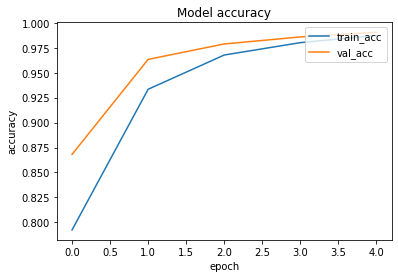

In [ ]:
# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()


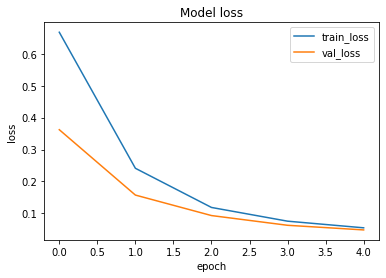

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(x_sample, y_sample, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3713/3713 [==============================] - 5s 1ms/step - loss: 0.0594 - acc: 0.9836
## evaluation loss and_metrics ##
[0.05942905694246292, 0.9836411476135254]


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))


In [ ]:
import joblib
joblib.dump(model, '/content/model.pkl')

INFO:tensorflow:Assets written to: ram://37853887-63c3-4964-9243-a1b5ace8de26/assets


['/content/model.pkl']

In [ ]:
# predicting on test data.
pred_test = model.predict(x_sample)
print(pred_test.size)
for i in range (pred_test.size):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

237608


In [ ]:
print(x_sample)
print(x_sample.columns)

        hostname_length  path_length  ...  count_dir  use_of_ip
0                    16           22  ...          2          1
1                    20           44  ...          4          1
2                    16            6  ...          2          1
3                    14           14  ...          1          1
4                    14           12  ...          3          1
...                 ...          ...  ...        ...        ...
237603               24           34  ...          3          1
237604               14           36  ...          5          1
237605               18            0  ...          0          1
237606               15           42  ...          4          1
237607               23           50  ...          6          1

[237608 rows x 16 columns]
Index(['hostname_length', 'path_length', 'fd_length', 'count-', 'count@',
       'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https',
       'count-www', 'count-digits', 'count-letters', '

In [ ]:
def view_result(array):
    array = np.array(array)
    for i in range(array.size):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

view_result(pred_test[:10])
view_result(y_sample[:10])

In [ ]:
view_result(pred_test[:10])

Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Mallicious
Non Mallicious


In [ ]:
view_result(y_sample[:10])

Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Mallicious
Non Mallicious


In [ ]:
get_clf_eval(y_sample, pred_test)

Confusion Matrix
[[118154    650]
 [  3237 115567]]
정확도:0.9836411231945053, 정밀도:0.994407014464321, 재현율:0.9727534426450288


In [ ]:
correct = 0
incorrect = 0
# print(type(y_test))
# print(y_test.to_numpy())
y_sample2 = y_sample.to_numpy()
# print(type(y_test2))
# print(type(pred_test))
print(y_sample2.size)
for i in range(y_sample2.size):
  if( y_sample2[i] == pred_test[i] ) :
    correct += 1
  else :
    incorrect += 1

print("correct : ", correct, " incorrect : ", incorrect)

237608
correct :  233721  incorrect :  3887


In [ ]:
model.save('model.h5')

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.path.realpath("openphish.csv"))
print(os.listdir("/content/"))

/content/openphish.csv
['.config', 'urldata.csv', 'real_total.csv', 'phishtank_verified_online.csv', 'total.csv', 'Alexa_top1M.csv', '.ipynb_checkpoints', 'openphish.csv', 'sample_data']


In [ ]:
real_total= pd.read_csv("/content/real_total.csv")

In [ ]:
urldata = pd.read_csv("/content/urldata.csv")
alexa = pd.read_csv("/content/Alexa_top1M.csv")
phishtank = pd.read_csv("/content/phishtank_verified_online.csv")
openphish = pd.read_csv("/content/openphish.csv")
total = pd.read_csv("/content/total.csv", sep="\t")

In [ ]:
print(real_total.shape)

(1463963, 4)


In [ ]:
#이름이 지정되지 않은 열 제거
urldata = urldata.drop('Unnamed: 0',axis=1)
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
print(urldata.shape)
print(alexa.shape)
print(phishtank.shape)
print(openphish.shape)
print(total.shape)

(450176, 3)
(1000000, 3)
(13287, 3)
(500, 3)
(2477760, 1)


In [ ]:
total = pd.concat([phishtank, openphish, alexa, urldata])

In [ ]:
print(total.shape)

(1463963, 3)


In [ ]:
total.head()

,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
total.to_csv('/content/real_total.csv')

In [ ]:
print(os.listdir("/content/"))

['.config', 'urldata.csv', 'real_total.csv', 'phishtank_verified_online.csv', 'total.csv', 'Alexa_top1M.csv', '.ipynb_checkpoints', 'openphish.csv', 'sample_data']


In [ ]:
real_total.head()

,Unnamed: 0,url,label,result
0,0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
#이름이 지정되지 않은 열 제거
real_total = real_total.drop('Unnamed: 0',axis=1)
real_total.head()

,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1


In [ ]:
print(real_total.shape)

(1463963, 3)


In [ ]:
real_total.drop_duplicates(['url'])

,url,label,result
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1
4,https://sms.vinted-pl.947519.space,malicious,1
...,...,...,...
1463958,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
1463959,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
1463960,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
1463961,http://atualizapj.com/,malicious,1


In [ ]:
print(real_total.shape)

(1463963, 3)


In [ ]:
real_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463963 entries, 0 to 1463962
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1463963 non-null  object
 1   label   1463963 non-null  object
 2   result  1463963 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.5+ MB


In [ ]:
real_total.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [ ]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

In [ ]:
#Length of URL
real_total['url_length'] = real_total['url'].apply(lambda i: len(str(i)))

In [ ]:
#Hostname Length
real_total['hostname_length'] = real_total['url'].apply(lambda i: len(urlparse(i).netloc))

In [ ]:
#Path Length
real_total['path_length'] = real_total['url'].apply(lambda i: len(urlparse(i).path))

In [ ]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

real_total['fd_length'] = real_total['url'].apply(lambda i: fd_length(i))

In [ ]:
real_total.head()

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0


In [ ]:
real_total['count-'] = real_total['url'].apply(lambda i: i.count('-'))

In [ ]:
real_total['count@'] = real_total['url'].apply(lambda i: i.count('@'))

In [ ]:
real_total['count?'] = real_total['url'].apply(lambda i: i.count('?'))

In [ ]:
real_total['count%'] = real_total['url'].apply(lambda i: i.count('%'))

In [ ]:
real_total['count.'] = real_total['url'].apply(lambda i: i.count('.'))

In [ ]:
real_total['count='] = real_total['url'].apply(lambda i: i.count('='))

In [ ]:
real_total['count-http'] = real_total['url'].apply(lambda i : i.count('http'))

In [ ]:
real_total['count-https'] = real_total['url'].apply(lambda i : i.count('https'))

In [ ]:
real_total['count-www'] = real_total['url'].apply(lambda i: i.count('www'))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
real_total['count-digits']= real_total['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
real_total['count-letters']= real_total['url'].apply(lambda i: letter_count(i))

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
real_total['count_dir'] = real_total['url'].apply(lambda i: no_of_dir(i))

In [ ]:
real_total.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0


In [ ]:
import re

In [ ]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
real_total['use_of_ip'] = real_total['url'].apply(lambda i: having_ip_address(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
real_total['short_url'] = real_total['url'].apply(lambda i: shortening_service(i))

In [ ]:
real_total.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://bewareoflea.hostingamazonemail.xyz/sig...,malicious,1,50,34,8,6,0,0,0,0,2,0,1,1,0,0,43,2,1,1
1,https://bewareoflea.hostingamazonemail.xyz/signim,malicious,1,49,34,7,6,0,0,0,0,2,0,1,1,0,0,43,1,1,1
2,http://bewareoflea.hostingamazonemail.xyz/sign...,malicious,1,168,34,8,6,0,0,2,0,9,4,2,1,1,1,132,2,1,1
3,http://password-verify.qswedepassrest.cloudns.ph/,malicious,1,49,41,1,0,1,0,0,0,3,0,1,0,0,0,41,1,1,1
4,https://sms.vinted-pl.947519.space,malicious,1,34,26,0,0,1,0,0,0,3,0,1,1,0,6,21,0,1,1


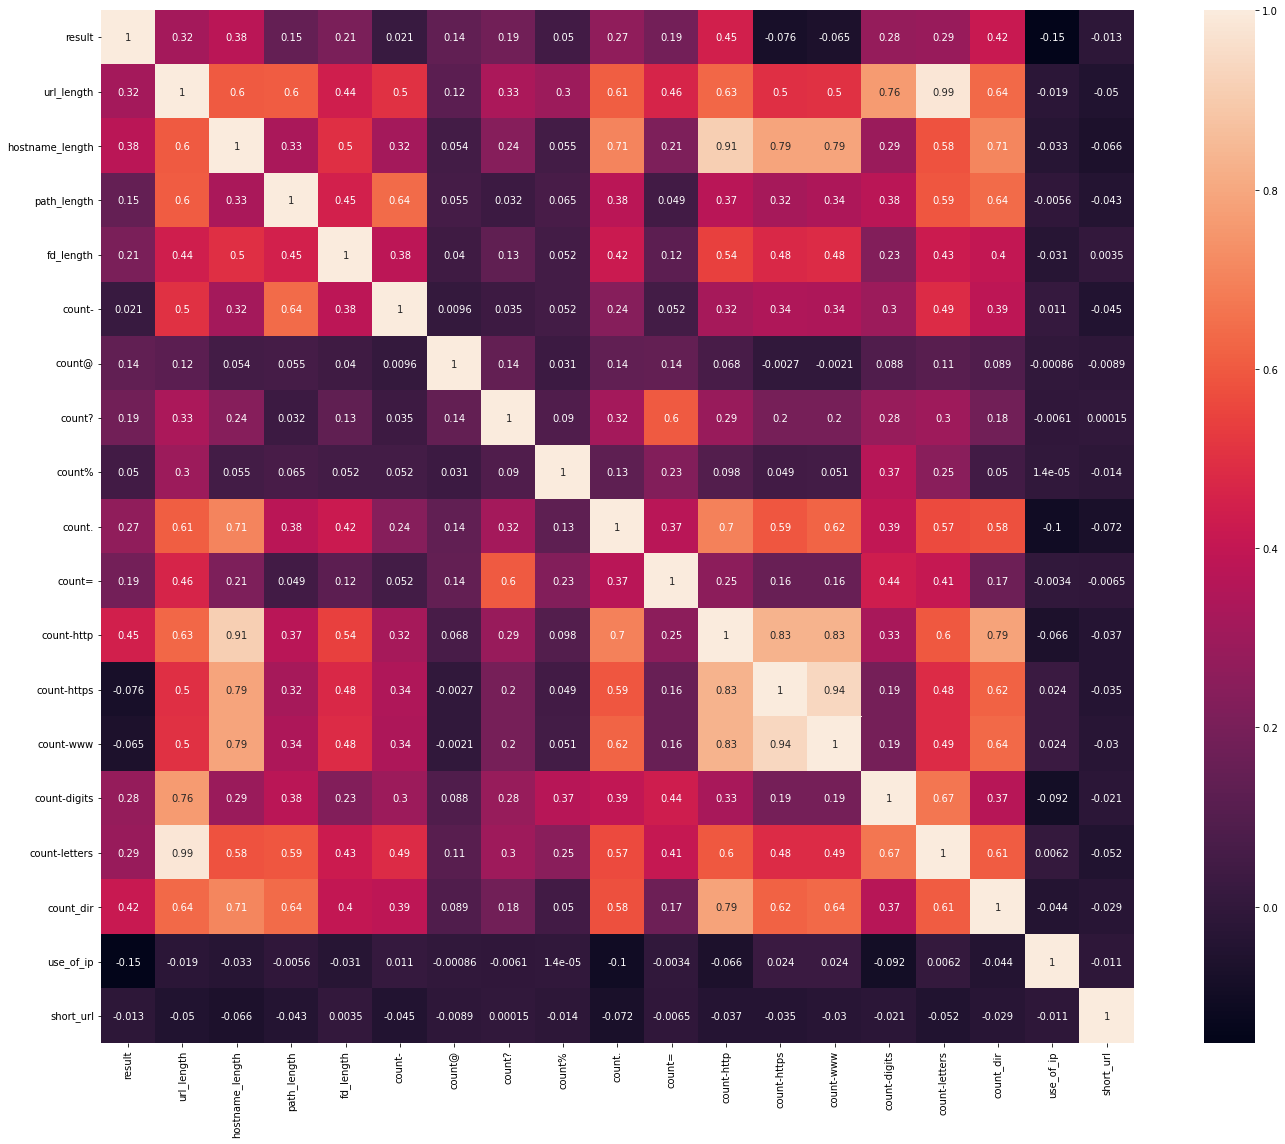

In [ ]:
#Heatmap
corrmat = real_total.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

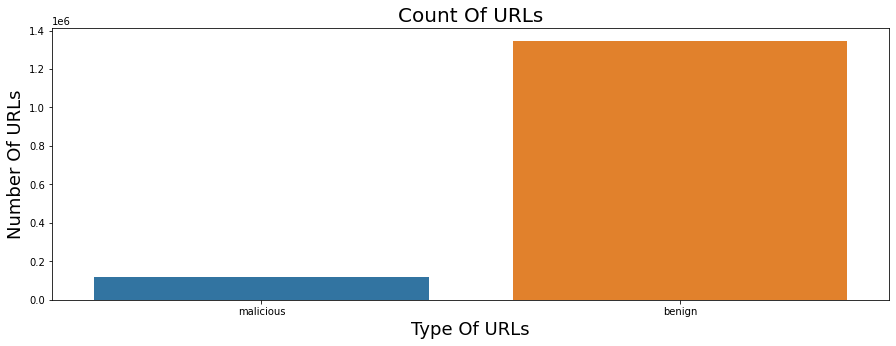

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=real_total)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(real_total[real_total['label']=='malicious'])/len(real_total['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(real_total[real_total['label']=='benign'])/len(real_total['label'])*100))

Percent Of Malicious URLs:8.08 %
Percent Of Benign URLs:91.92 %


(0.0, 1000.0)

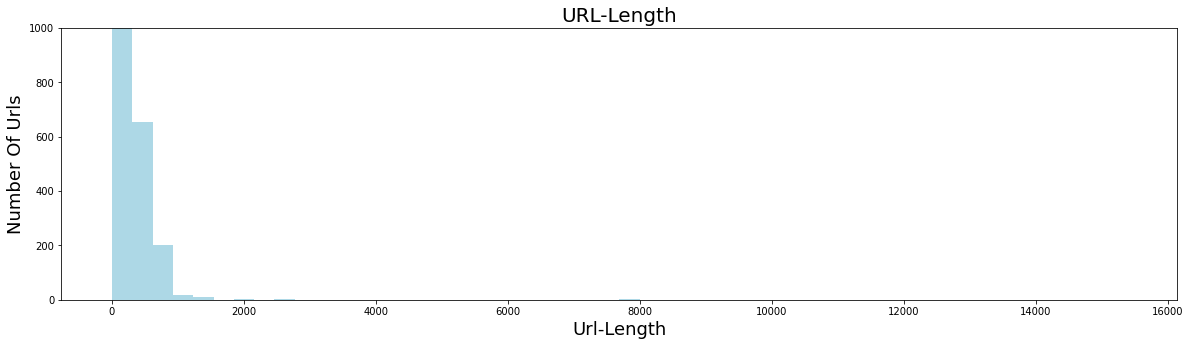

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(real_total['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

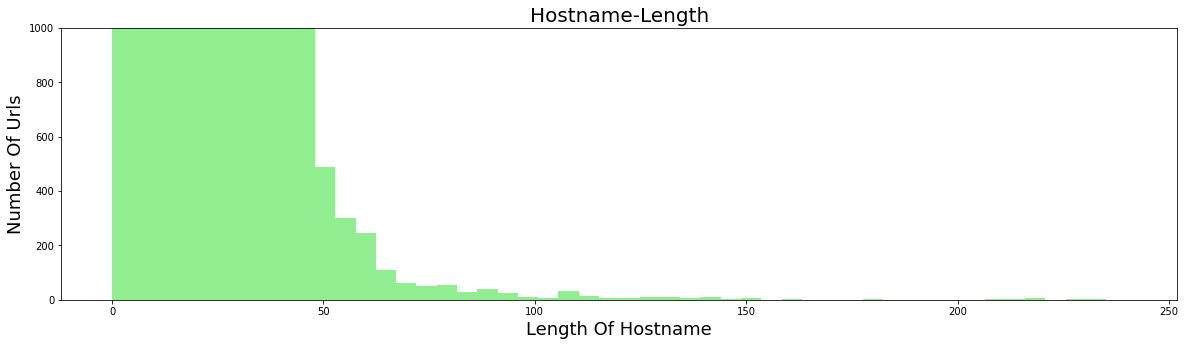

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(real_total['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

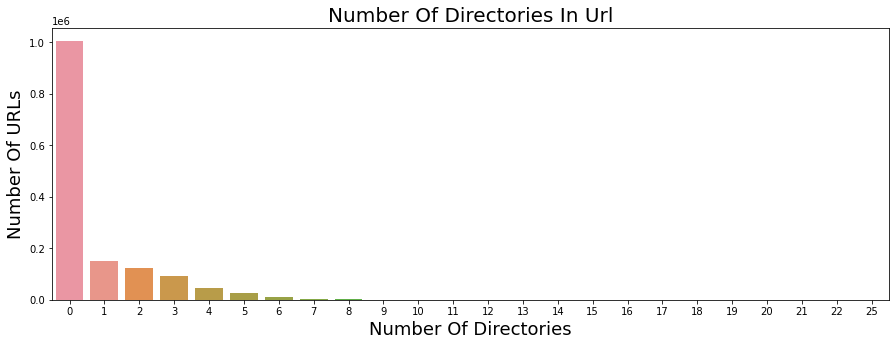

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=real_total)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

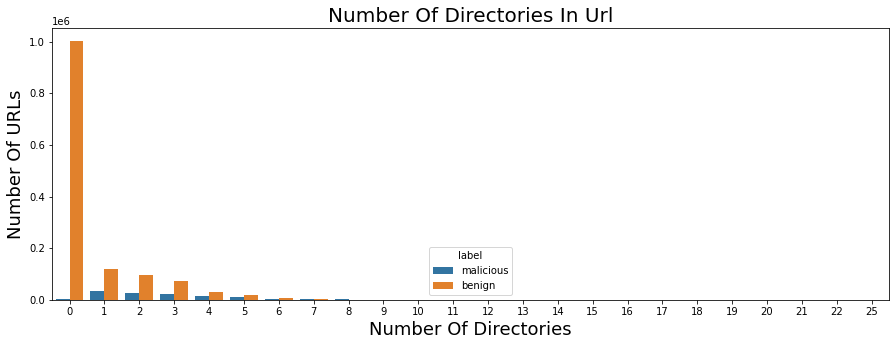

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=real_total,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

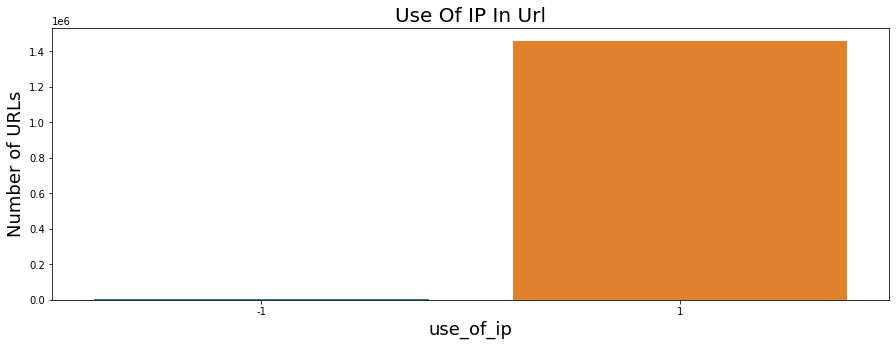

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(real_total['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

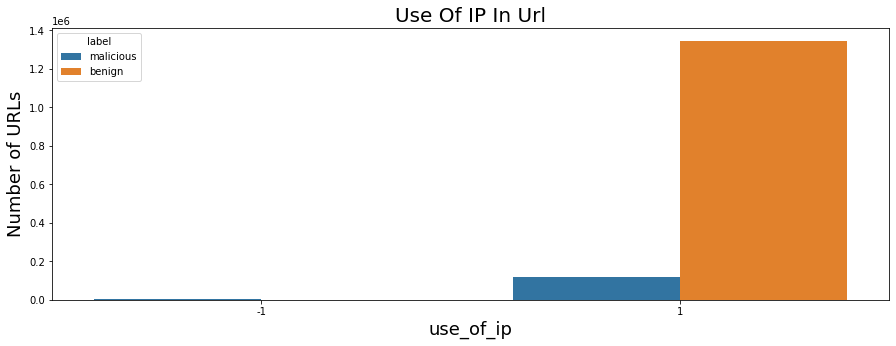

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(real_total['use_of_ip'],hue='label',data=real_total)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

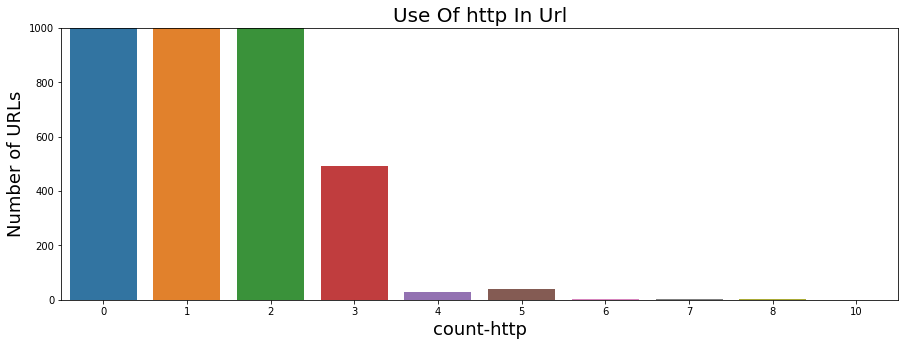

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(real_total['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

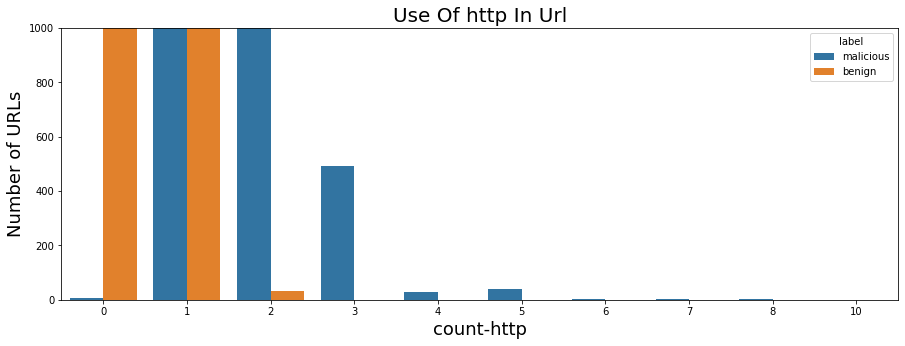

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(real_total['count-http'],hue='label',data=real_total)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

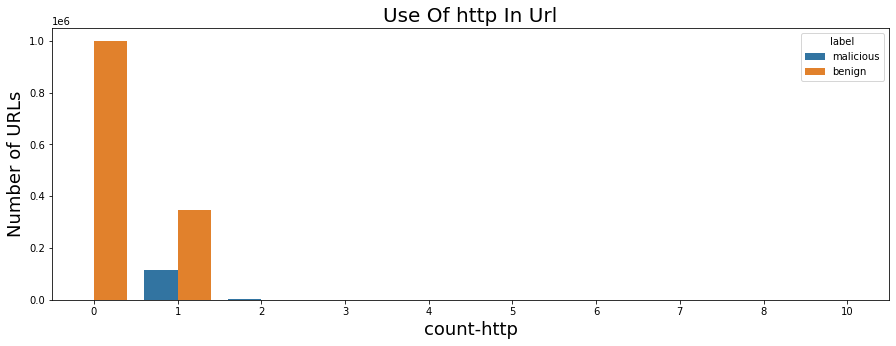

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(real_total['count-http'],hue='label',data=real_total)

plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

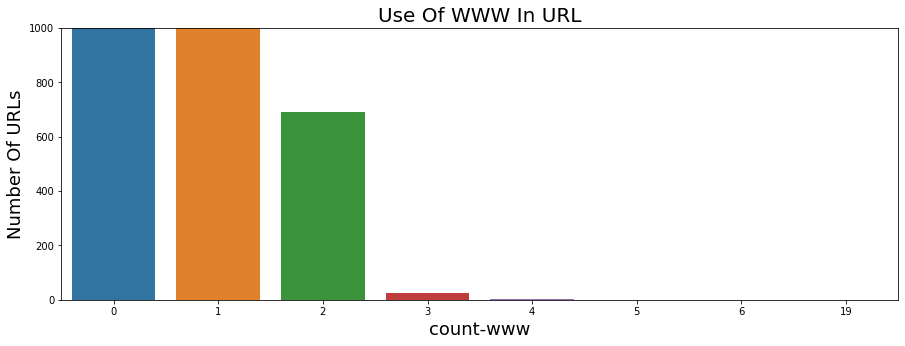

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(real_total['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

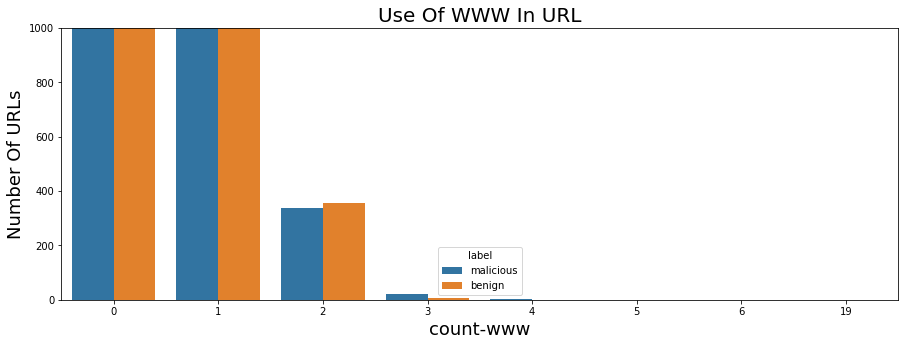

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(real_total['count-www'],hue='label',data=real_total)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#Independent Variables
x = real_total[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = real_total['result']

In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (2691476, 16)
Size of y-sample : (2691476, 1)


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

In [ ]:
print(y_sample[(y_sample == 1)].count())
print(y_sample[(y_sample == 0)].count())

0    1345738
dtype: int64
0    1345738
dtype: int64


In [ ]:
y_sample.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2153180, 16)
Shape of x_test:  (538296, 16)
Shape of y_train:  (2153180, 1)
Shape of y_test:  (538296, 1)


In [ ]:
from sklearn.svm import SVC
 
svm_model = SVC(kernel='rbf', C=8, gamma=0.1)
 
svm_model.fit(x_train, y_train) # SVM 분류 모델 훈련

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))